<a href="https://colab.research.google.com/github/aaronmat1905/MLdiaries/blob/main/Deep%20Learning/AE_AutoEncoders/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Source Inspired from material available on Internet, AI and particularly*
- https://avandekleut.github.io/vae/

In [1]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(0)
plt.rcParams['figure.dpi'] = 200

# **AutoEncoders**
*The Basics*

> **Autoencoders** are **neural networks** that learn to **compress data** into a **smaller form**, and then **reconstruct** it, capturing essential patterns in the process.

It is then trained to minimize the **Reconstruction Error** → *The Error between the original Input and the reconstructed Input*

**Main Components of the AutoEncoder**:
1. Encoder
> Encoder Compresses the data into a compact representation → **Latent Space**
2. Decoder
> Decoder Reconstructs the original data from the compact representation

By the end of the training process, the model can understand which details/features are important to keep and which could be left out.
___
**Mathematically**,

$$
  Z= f(w_e.x + b_e)
$$
Where, `Z` is the Lower dimension representation, `{w_e and b_e}` are the encoder weight and bias.

And,
$$
  X'=f(w_d.Z+b_d)
$$
Where `X'` is the Reconstructed input vector, and the rest are decoder weights and bias.
___
**Notes**
- AE can learn non-linear representation of data
- It is not-interpretable
- It is self-supervised/unsupervised, so we use it for **Classification or Regression**
- Latent Space Dimensionality is always lesser than or equal to the Inpur vector dimensionality

> **Technically, we predict input from input**

**Applications**
- Image Inpainting [Filling in the missing parts of an image]
- Image Sorting [Breaking the image into parts and then, sorting them correctly]

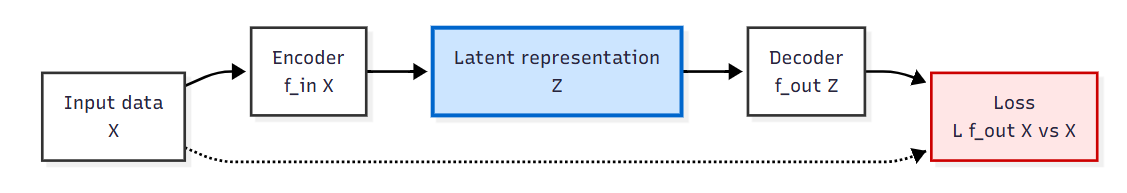

### **Encoder**

In [4]:
# nn.Module is a base class for all Neural Network modules in PyTorch

class Encoder(nn.Module):
  def __init__(self, latent_dims):
    super(Encoder, self).__init__() # Calls the constructor of the parent class nn.Module
    self.linear1 = nn.linear(784, 512) # Maps the input from 784 dimensions to 512 dimensions
    self.linear2 = nn.linear(512, latent_dims) # Maps the 512-dimensional input to latent_dims (Size of the compressed representation)
  def forward(self, x):
    # Sequence of computations applied to the input tensor
    x = torch.flatten(x, start_dim=1) # Flattens each image into a single vector of length 784 keeping batch dimension intact
    x = F.relu(self.linear1(x)) # Flattened vector first passed through self.linear1 followed by Relu activation function
    return self.linear2(x) # Final output is the latent representation, to be used by the decoder or for tasks like clustering

### **Decoder**

In [8]:
class Decoder(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder, self).__init__()
        self.linear1 = nn.Linear(latent_dims, 512)
        self.linear2 = nn.Linear(512, 784)

    def forward(self, z):
        z = F.relu(self.linear1(z))
        z = torch.sigmoid(self.linear2(z))
        return z.reshape((-1, 1, 28, 28))

### **AutoEncoder (AE)**

In [9]:
class AutoEncoder(nn.Module):
  def __init__(self, latent_dims):
    super(AutoEncoder, self).__init__()
    self.encoder = Encoder(latent_dims)
    self.decoder = Decoder(latent_dims)
  def forward(self, x):
    z = self.encoder(x)
    return self.decoder(z)